In [1]:
from lab3.experiment.base import ImagingExperiment, fetch_trials
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='ticks')

# Data processing

### Trials

We'll use the `fetch_trials` function to retrieve the trial ids from the database. Since there are only two trials for the mouse we care about, just specifying `project_name` and `mouse_name` is sufficient, but you could filter by additional attributes/identifiers if you were to later upload additional trials.

In [2]:
df_ids = fetch_trials(project_name='steph', mouse_name='sah004')

# load each trial as an ImagingDataset
df_expt_list = [ImagingExperiment(trial_id) for trial_id in df_ids]

### Signal import

All of these datasets were previously extracted, so let's import the signals. We can do this by accessing the `suite2p_imaging_dataset` property of the experiment object, which gives us access to the `import_results` method. Here's a look at the doc string. We'll just use the default arguments

In [3]:
expt = df_expt_list[0]
expt.suite2p_imaging_dataset.import_results?

Signature: expt.suite2p_imaging_dataset.import_results(**kwargs)
Docstring:
Import Suite2p signal results using the new-style signal formats
(dataframes and h5 stores).

Parameters
----------
ds : Suite2pStrategy
    Instance of a Suite2pStrategy, which has been previously extracted.
label : str, optional
    ROI label to store the signals and ROI masks under. Defaults to
    'suite2p'.
channel : {str or int}, optional
    Name or index of dynamic channel in the imaging dataset. Defaults
    to 'Ch2'.
overwrite : bool, optional
    If key '/{channel}/{label}' already exists in the dataset signals
    file, overwrite with new import. Note this will delete any
    additional signal types in the store in addition to the 'raw' and
    'npil' (e.g. 'dfof'), to prevent mixtures of signals derived from
    different imports. Defaults to False, which will raise an error if
    the desired key already exists.

See also
--------
lab3.extraction.s2p_helpers.import_to_signals_file
File:      ~/cod

In [1]:
# loop through each experiment and import signals
for expt in df_expt_list:
    
    print(f'Processing experiment {expt}')
    expt.suite2p_imaging_dataset.import_results(overwrite=False)
    print('\n')

NameError: name 'df_expt_list' is not defined

We can now easily access the signals for each ROI from the `signals` method of the `ImagingExperiment` object.

In [5]:
expt.signals?

Signature: expt.signals(trim_to_behavior=True, **kwargs)
Docstring:
doc string

Parameters
----------
trim_to_behavior : bool, optional
    If imaging data exceeds behavior data length, trim the excess
    frames to match. Defaults to True.
channel : {str, int}, optional
    Channel name or index in the imaging dataset
label : str, optional
    ROI list label in the imaging dataset
signal_type : str {'raw', 'npil', 'dfof', 'spikes', or custom}
    Name of signal type, defaults to 'raw'

Returns
-------
signals : pd.DataFrame
File:      ~/code/lab3/lab3/experiment/base.py
Type:      method


In [6]:
# the signals are stored as a dataframe, which is like a 2D table. each row is labeled with the ROI label
raw = expt.signals(label='suite2p', signal_type='raw')
raw

,0,1,2,3,4,5,6,7,8,9,...,22427,22428,22429,22430,22431,22432,22433,22434,22435,22436
roi_label,,,,,,,,,,,,,,,,,,,,,
0000-0275-0272,3258.327637,3469.690918,3460.975586,3528.798340,3610.389648,3056.214844,3300.809326,3309.702881,3514.259277,3849.648438,...,2219.958740,2762.066406,1827.521484,2430.101318,2413.029053,2446.866211,2114.483154,2159.858154,2089.421631,1770.159790
0000-0265-0277,2968.178711,3439.499268,3270.910889,3011.287598,3434.238525,3254.050049,3698.784668,3717.422852,3057.206055,3023.861816,...,3153.958984,2692.417236,2960.460693,3036.822998,3099.054199,2944.754883,2940.524658,2369.757324,2525.695068,2795.482422
0000-0170-0360,3519.897217,4027.105225,3310.214111,3596.888428,3649.606689,3786.734619,3110.443848,3546.699951,3175.380371,3426.727051,...,2217.239746,2667.127930,2358.019287,2922.780518,2350.579346,2565.200928,2279.690430,2341.372314,2831.887207,2544.254883
0000-0273-0236,2860.120605,3583.784912,3461.809570,3620.894775,3172.291260,2683.834229,3055.863525,2921.586670,2872.652588,2975.187988,...,2147.458984,2574.146973,2237.713867,2952.558838,2626.135742,2528.465088,2460.345703,2923.436279,2480.894043,2570.092529
0000-0209-0274,2499.281250,2640.375000,2889.663818,2676.282227,3089.974365,2916.771973,2850.238770,2645.070557,2657.545410,2758.389648,...,2765.858643,3373.377197,2894.822021,2944.409424,2533.922119,2448.292480,2497.057373,2692.860352,2470.857910,2345.302490
0000-0220-0317,2905.680908,3547.435791,3059.283936,2721.838623,2897.374268,3992.935059,3243.268311,3598.064941,2923.157959,3329.666748,...,3309.544189,3558.224854,3675.111572,2975.724121,3442.927490,3464.514404,3380.876221,2704.102295,2892.340820,3600.511963
0000-0177-0393,1652.561279,1805.782837,1777.023682,1523.144409,1376.707397,1402.849243,1356.173218,1527.944580,1652.291748,1508.791138,...,1099.775391,1375.379028,1101.237061,1355.170166,1175.580566,1382.585571,1015.697327,1126.995850,1101.323853,1557.661987
0000-0200-0348,2935.041748,3498.555664,3522.144531,3395.363525,2974.877197,3241.782471,3445.441406,3489.609619,3593.173096,2942.964111,...,7671.800293,7594.137207,7649.977539,7776.672852,7600.228027,7638.495117,7558.515137,7424.862793,7561.807617,7243.496094
0000-0230-0238,1479.580811,1495.604492,1046.654785,1327.906250,1722.875854,1470.833618,1159.566162,983.153687,1282.784180,1746.572266,...,1240.659180,1109.797974,1177.360596,917.848267,1047.790894,805.779968,1005.577881,807.536011,1207.995605,1091.944946


### Signal processing -- $\Delta$F/F

Now that we've imported the raw signals, we want to calculate $\Delta$F/F. We can do this easily using tools provided in the `lab3.signal` module.

In [7]:
from lab3.signal.dfof import Suite2pDFOF

There are many possible $\Delta$F/F strategies included in the dfof module. We'll use the Suite2p-specific one, which will take into account the neuropil estimate that suite2p provides.

In [8]:
# Here's a quick look at the documentation for the dF/F strategy
Suite2pDFOF?

Init signature:
Suite2pDFOF(
    window=600,
    sigma=10,
    min_periods=0.2,
    constant_denominator=False,
)
Docstring:     
Class for calculating dF/F that takes into account Suite2p neuropil
estimations. Subtracting the scaled neuropil from the raw trace can be
valuable for removing bleedthrough from nearby ROIs or other local diffuse
signals that a low-pass baseline will obscure. However, this initial
subtraction complicates estimating dF/F, as the resulting residual trace
will have a baseline close to zero (or negative). Thus it is necessary to
"add back in" the component of the low-pass baseline that was removed by
the neuropil correction, to avoid distortions in the dF/F due to small or
negative denominator terms.

The unfiltered neuropil is first subtracted from the unfiltered raw trace.
Two partial baselines are estimated then by filtering the residual raw
trace, and the neuropil. The residual raw trace minus its partial baseline
forms the numerator term of the dF/F. The d

In [9]:
# We can calculate dF/F and store it in the experiment's signals file automatically by using the calculate_dfof method
expt.calculate_dfof?

Signature: expt.calculate_dfof(strategy, channel='Ch2', label=None, overwrite=False)
Docstring:
Calculate dF/F from raw signals.

Parameters
----------
strategy : DFOFStrategy
    Instance of a DFOFStrategy. See lab3.signal.dfof
channel : {str, int}, optional
    Channel label or index in imaging dataset
label : str, optional
    ROI label in imaging dataset
overwrite : bool, optional
    Whether to overwrite signal key if it exists already. Defaults to
    False

Returns
-------
dfof : pd.DataFrame
File:      ~/code/lab3/lab3/experiment/base.py
Type:      method


In [10]:
# Initialize the strategy with our parameters
# Data was imaged at 10 Hz, and we'll use 60 sec of data for the baseline window, 
# with a sigma of 1 sec for the baseline smoothing

dfof_strategy = Suite2pDFOF(window=600, sigma=10, constant_denominator=True)

for expt in df_expt_list:

    print(f'Calculating dF/F for {expt}')
    expt.calculate_dfof(dfof_strategy, label='suite2p', overwrite=True)

Calculating dF/F for <ImagingExperiment: trial_id=22040 mouse_id=880 experimentType=contextAlternationAB_abbreviated>
Calculating dF/F for <ImagingExperiment: trial_id=22039 mouse_id=880 experimentType=contextAlternationAB_abbreviated>


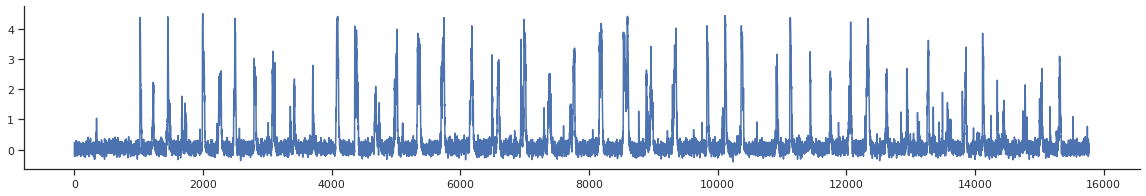

In [11]:
# Let's look at an example trace quickly. we can load the results using the expt.signals method like before
# We should check that the baseline is generally flat and the noise generally centered around 0

expt = df_expt_list[0]
dfof = expt.signals(label='suite2p', signal_type='dfof')
plt.figure(figsize=(20, 3))
plt.plot(dfof.iloc[0])
sns.despine()

### Signal processing -- Spike inferencing

Now that we've calculated $\Delta$F/F, we can run spike inferencing. This processing step, similar to the `lab3.signal.dfof` module, is implemented as a set of strategies that we can choose from, located in `lab3.signal.spikes`. We'll use the `OasisAR1` strategy, which is an algorithm developed by Liam Paninski's group.

In [13]:
from lab3.signal.spikes import OasisAR1Spikes
OasisAR1Spikes?

Init signature: OasisAR1Spikes(tau=0.7, fs=10, n_mad=3, oasis_kws={})
Docstring:     
Infer spikes using the OASIS method, AR1 model variaton.

TODO framerate should be in the metadata of the signals dataframe, so we
don't have to pass it explicitly

Parameters
----------
tau : float, optional
    Decay time constant of the indicator, in seconds. Defaults to 0.7,
    which is a reasonable number for GCaMP6f.
fs : float, optional
    Frame rate, in Hz. Defaults to 10.
n_mad : int, optional
    Filter spikes following inference, discarding any events with an
    amplitude less than n_mad * median absolute deviation of the original
    signal trace (e.g., 3 n_mad corresponds roughly to discarding spikes
    with an amplitude less than 2 standard deviations of the original
    trace). Defaults to 0 (no filtering).
oasis_kws : dict, optional
    description

Returns
-------
spikes : pd.DataFrame

Attributes
----------
baseline : pd.DataFrame
thresholds : pd.Series
File:           ~/code/lab

In [14]:
# Initialize the strategy with our parameters
spikes_strategy = OasisAR1Spikes(fs=10, n_mad=3)

for expt in df_expt_list:

    print(f'Calculating spikes for {expt}')
    expt.infer_spikes(spikes_strategy, label='suite2p', overwrite=True)

Calculating spikes for <ImagingExperiment: trial_id=22040 mouse_id=880 experimentType=contextAlternationAB_abbreviated>


/home/james/.local/lib/python3.6/site-packages/oasis/functions.py:815: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  g = np.linalg.lstsq(A, xc[1:])[0]


Calculating spikes for <ImagingExperiment: trial_id=22039 mouse_id=880 experimentType=contextAlternationAB_abbreviated>


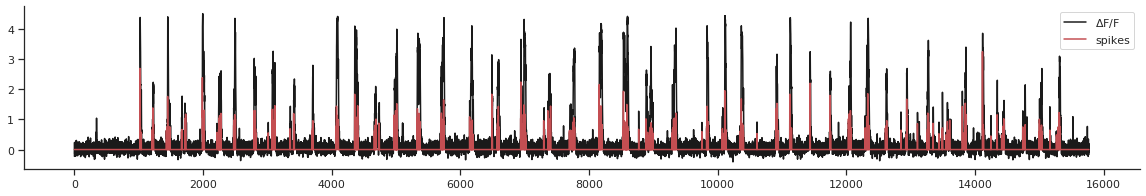

In [15]:
# Looking at the example trace again, with spikes now

expt = df_expt_list[0]
dfof = expt.signals(label='suite2p', signal_type='dfof')
spikes = expt.signals(label='suite2p', signal_type='spikes')

plt.figure(figsize=(20, 3))
plt.plot(dfof.iloc[0], color='k', label=r'$\Delta$F/F')
plt.plot(spikes.iloc[0], color='r', label='spikes')
plt.legend()
sns.despine()

### Summary
We've completed all the basic signal processing steps, so just to summarize, we can look at an overview of all the signals info associated with each of the experiment objects now.

In [17]:
for expt in df_expt_list:
    
    print(f'Signals file for {expt}:')
    print(f'{expt.signals_file().info()}\n')

Signals file for <ImagingExperiment: trial_id=22040 mouse_id=880 experimentType=contextAlternationAB_abbreviated>:
<class 'lab3.signal.base.SignalFile'>
File path: /data3/drsteph/Imaging/VR/sah004/9_2_2019/contextSwitch-000/contextSwitch-000.sima/signals.h5
/Ch2/suite2p/dfof              frame        (shape->[658,15775])
/Ch2/suite2p/npil              frame        (shape->[658,15775])
/Ch2/suite2p/raw               frame        (shape->[658,15775])
/Ch2/suite2p/spikes            frame        (shape->[658,15775])

Signals file for <ImagingExperiment: trial_id=22039 mouse_id=880 experimentType=contextAlternationAB_abbreviated>:
<class 'lab3.signal.base.SignalFile'>
File path: /data3/drsteph/Imaging/VR/sah004/9_3_2019/contextAlternation-000/contextAlternation-000.sima/signals.h5
/Ch2/suite2p/dfof              frame        (shape->[592,22437])
/Ch2/suite2p/npil              frame        (shape->[592,22437])
/Ch2/suite2p/raw               frame        (shape->[592,22437])
/Ch2/suite2p/spike